# IST652 Final Project - Google Play Store Apps Analysis
### Data Source: https://www.kaggle.com/datasets/lava18/google-play-store-apps 
The dataset for the final project is about Google Play store
apps from the Kaggle website. There are two datasets related to the project. One of the datasets records details of applications such as category, size, rating, and installations with 10841 rows and 13 columns. Another dataset contains app reviews from users with 64295 rows and 5 columns. There will be enough data for the final project of supporting analysis of the datasets to find out interesting stories and insights.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

## PART I : Data Preprocessing

1. Understanding the data
2. Cleaning dataset

### 1.1 Load and Learn the Dataset 

In [2]:
app_data = pd.read_csv("data/googleplaystore.csv")
app_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# Basic understanding about the 'googleplaystore.csv' dataset
app_data.info

<bound method DataFrame.info of                                                      App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE

In [4]:
# the shape of the data
app_data.shape

(10841, 13)

In [5]:
# the number of unique Apps
app_data['App'].nunique()

9660

In [6]:
# unique categories in the data
app_data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [7]:
app_data['Category'].nunique()

34

In [8]:
# The gradation of installations in the dataframe
app_data.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [9]:
# Viewing the content rating; who is permitted to download these apps
app_data["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

### 1.2 Data Cleaning
Here we will delete the duplicated rows and will remove the Nan entries. Also, we will try to convert the possible columns to numeric entries that helps us to analyse data.

In [10]:
##Clean Dataset - Rename columns
app_data = app_data.rename(columns={"Content Rating": "Content_rating","Last Updated": "Last_updated","Current Ver": "Current_ver","Android Ver": "Android_ver"})
app_data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_rating,Genres,Last_updated,Current_ver,Android_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
print (app_data.dtypes)

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content_rating     object
Genres             object
Last_updated       object
Current_ver        object
Android_ver        object
dtype: object


In [12]:
##drop none_date rows in the datasets
indexAge = app_data[ app_data["Last_updated"]=='1.0.19'].index
app_data.drop(indexAge , inplace=True)

In [13]:
app_data['LastUpdates'] = pd.to_datetime(app_data['Last_updated'], format='%B %d, %Y')
app_data['Up_year'] = pd.Series(app_data['LastUpdates']).dt.year
app_data['Up_month'] = pd.Series(app_data['LastUpdates']).dt.month
app_data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_rating,Genres,Last_updated,Current_ver,Android_ver,LastUpdates,Up_year,Up_month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018-01-07,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018-01-15,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2018-08-01,2018,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2018-06-08,2018,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018-06-20,2018,6


In [14]:
# missing data
app_data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_rating       0
Genres               0
Last_updated         0
Current_ver          8
Android_ver          2
LastUpdates          0
Up_year              0
Up_month             0
dtype: int64

In [15]:
#calculating the RATING based on mean value
app_data['Rating'].fillna((app_data['Rating'].mean()), inplace=True)
#droping the rest of na values
app_data = app_data.dropna()

In [16]:
#checking NAs
app_data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_rating    0
Genres            0
Last_updated      0
Current_ver       0
Android_ver       0
LastUpdates       0
Up_year           0
Up_month          0
dtype: int64

In [17]:
# Remove '+' from 'Number of Installs' to make it numeric
app_data['Installs'] = app_data['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
# While converting the column into float,we have to remove ',' too
app_data['Installs'] = app_data['Installs'].apply(lambda x: x.replace(',', '') if ','in str(x) else x)
app_data["Installs"] = pd.to_numeric(app_data["Installs"])

# Removing "$" from the data entries in the column "Price" so that it can be converted to float
app_data['Price'] = app_data['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))
# Convert the data in "Price" to float
app_data["Price"]= app_data.Price.astype(float)

# removing the "m" which is the mb for the size
app_data.Size= app_data["Size"].str.replace("M", "")
app_data.Size= app_data['Size'].str.replace("Varies with device","-1")
# Here we replace k and change the unit to Mb
app_data['Size']=app_data['Size'].apply(lambda x: str(round((float(x.rstrip('k'))/1024),1) )if x[-1]=='k' else x)

app_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_rating,Genres,Last_updated,Current_ver,Android_ver,LastUpdates,Up_year,Up_month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018-01-07,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018-01-15,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2018-08-01,2018,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2018-06-08,2018,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018-06-20,2018,6


In [18]:
# Converting the data in the column "Reviews" to float to that we can apply statistics
app_data.Reviews= app_data.Reviews.astype(float) 

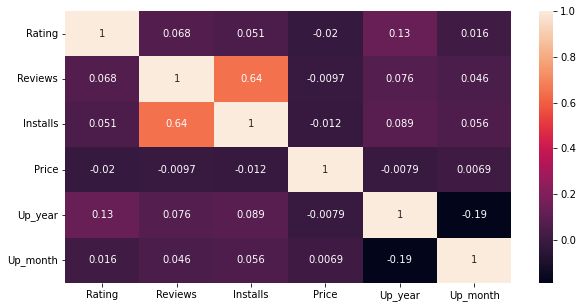

In [19]:
#Correlation Heatmap
plt.figure(figsize=(10,5))
corr= app_data.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [20]:
print (app_data.dtypes)

App                       object
Category                  object
Rating                   float64
Reviews                  float64
Size                      object
Installs                   int64
Type                      object
Price                    float64
Content_rating            object
Genres                    object
Last_updated              object
Current_ver               object
Android_ver               object
LastUpdates       datetime64[ns]
Up_year                    int64
Up_month                   int64
dtype: object


In [21]:
# save the data
app_data.to_csv("data/googleplaystore_cleaned.csv",index=False)

## PART II : Structured Data Analysis
1. Most popular category 
2. App with the largest size 
3. App with the largest num of installs  
4. Most installed and most rated apps / most installed and reviewed apps  
5. Content Rating Analysis 
6. Price Analysis 

In [22]:
#DATASET:
app_df = pd.read_csv("data/googleplaystore_cleaned.csv")
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_rating,Genres,Last_updated,Current_ver,Android_ver,LastUpdates,Up_year,Up_month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018-01-07,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018-01-15,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2018-08-01,2018,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2018-06-08,2018,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018-06-20,2018,6


### 2.1 Most popular category

In [23]:
# It will be easy to find out, which category is the most popular, if we visualize our data.
# the categories do we have.

app_df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [24]:
len(app_df.Category.unique())

33

In [25]:
app_df.Category.value_counts(ascending=False)

FAMILY                 1968
GAME                   1144
TOOLS                   841
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         390
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     230
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  82
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

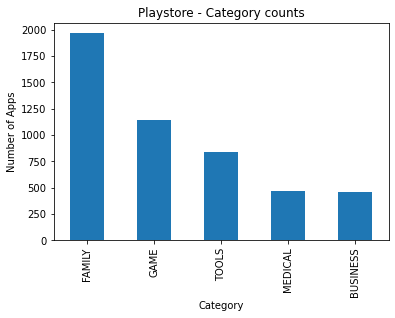

In [26]:
#Top five categories with respect to value count of app
app_df.Category.value_counts(ascending=False).nlargest(5).sort_values(ascending=False).plot.bar()
plt.ylabel("Number of Apps")
plt.xlabel("Category")
plt.title("Playstore - Category counts")
plt.show()

In [27]:
#We read the top five categories in the apps
app_df["Category"].value_counts().nlargest(5).sort_values(ascending=False)

FAMILY      1968
GAME        1144
TOOLS        841
MEDICAL      463
BUSINESS     460
Name: Category, dtype: int64

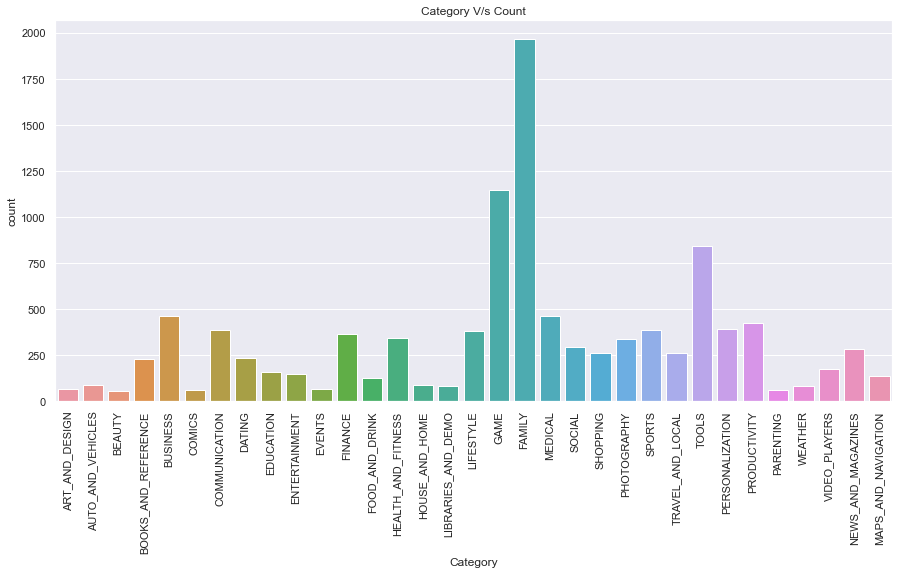

In [28]:
plt.figure(figsize=(15,7))
sns.set_theme(style="darkgrid")
plt.xticks(rotation=90)
plt.title("Category V/s Count")
ax = sns.countplot(x="Category", data=app_df)

In [29]:
# Getting the measures of central tendency for all the installation grouped by "Category"
app_df.groupby("Category").Installs.agg(["min", "mean", "median", "max"])

,min,mean,median,max
Category,,,,
ART_AND_DESIGN,0,1.942705e+06,100000.0,50000000
AUTO_AND_VEHICLES,1,6.250613e+05,100000.0,10000000
BEAUTY,50,5.131519e+05,50000.0,10000000
BOOKS_AND_REFERENCE,1,8.354211e+06,10000.0,1000000000
BUSINESS,0,2.178076e+06,1000.0,100000000
COMICS,50,9.347692e+05,100000.0,10000000
COMMUNICATION,1,8.435989e+07,1000000.0,1000000000
DATING,1,1.129533e+06,100000.0,10000000
EDUCATION,1000,5.586231e+06,1000000.0,100000000


In [30]:
# As can easily be seen from the plot, FAMILY apps is definitely the highest.
# Result
# The most popular category in this dataset is FAMILY.

### Proportion of Categories Applications on on Google Play Store by Year 

In [31]:
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_rating,Genres,Last_updated,Current_ver,Android_ver,LastUpdates,Up_year,Up_month
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,2018-01-07,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,2018-01-15,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2018-08-01,2018,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,2018-06-08,2018,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2018-06-20,2018,6


In [32]:
##Aggregate data by year and categories
yearly_app = app_df.groupby(["Up_year"]).size().reset_index(name='app_cnt').sort_values(by=['Up_year'])
yearly_app_cat=app_df.groupby(["Up_year","Category"]).size().reset_index(name='app_cnt').sort_values(by=['Up_year'])

In [33]:
##join two tables to calculate application categories porportion by year
app_cat_yearly = pd.merge(yearly_app_cat,yearly_app,on=['Up_year','Up_year'],how='left')
app_cat_yearly = app_cat_yearly.rename(columns={"app_cnt_x": "Appcnt_byCat","app_cnt_y": "Appcnt_byYear"})
app_cat_yearly["prop"] = app_cat_yearly.Appcnt_byCat/app_cat_yearly.Appcnt_byYear

In [34]:
app_cat_yearly

,Up_year,Category,Appcnt_byCat,Appcnt_byYear,prop
0,2010,FAMILY,1,1,1.000000
1,2011,BOOKS_AND_REFERENCE,1,15,0.066667
2,2011,BUSINESS,1,15,0.066667
3,2011,FAMILY,1,15,0.066667
4,2011,GAME,4,15,0.266667
...,...,...,...,...,...
183,2018,FAMILY,1135,7344,0.154548
184,2018,FINANCE,295,7344,0.040169
185,2018,FOOD_AND_DRINK,114,7344,0.015523
186,2018,COMMUNICATION,274,7344,0.037309


#### Yearly application prop timeseries plot

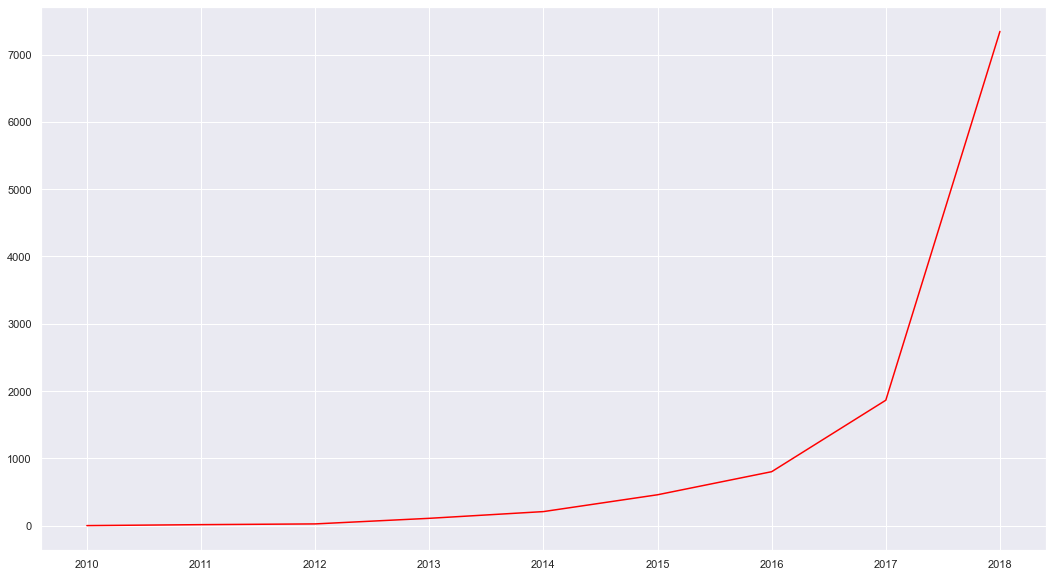

In [35]:
##yearly_app cnt timeseries plot
fig = plt.subplots(figsize =(18, 10))
plt.plot(yearly_app.Up_year,yearly_app.app_cnt,color="red")

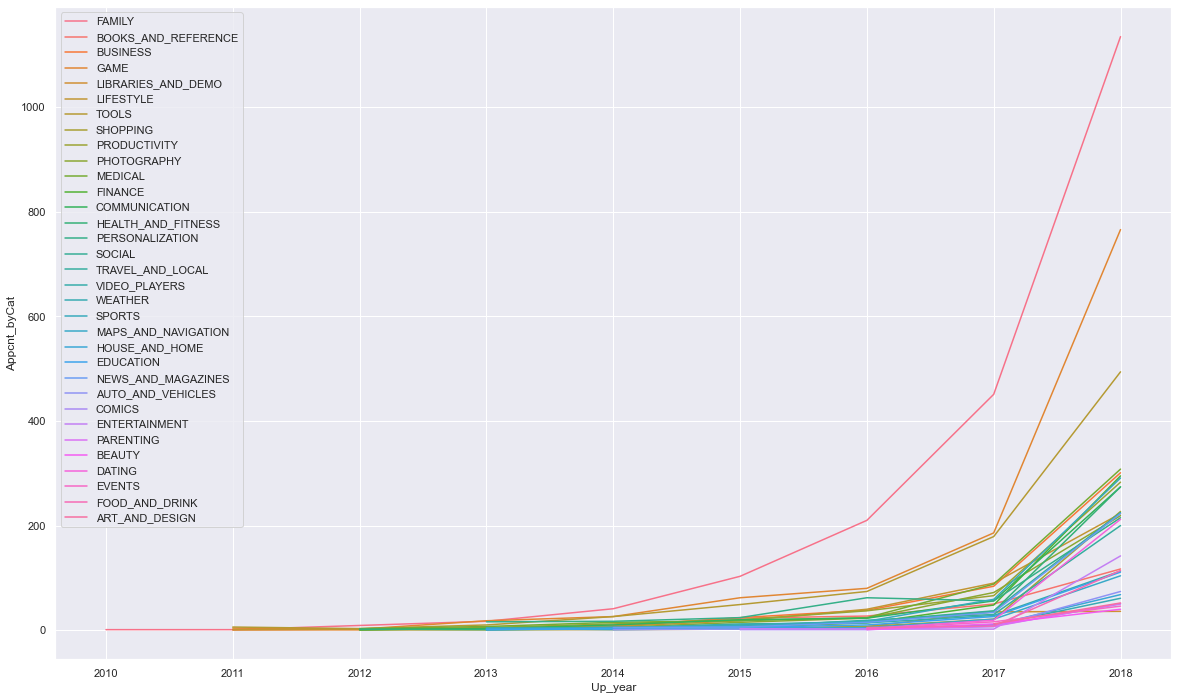

In [36]:
fig = plt.subplots(figsize =(20, 12))
sns.lineplot(data=app_cat_yearly, x="Up_year", y="Appcnt_byCat", hue="Category")
plt.legend(loc="best")

In [40]:
import plotly.express as px

In [37]:
app_cat_yearly.groupby("Category")['Appcnt_byCat'].sum().reset_index(name='app_cnt').sort_values(by=['app_cnt'],ascending=False)

,Category,app_cnt
11,FAMILY,1968
14,GAME,1144
29,TOOLS,841
20,MEDICAL,463
4,BUSINESS,460
25,PRODUCTIVITY,424
23,PERSONALIZATION,390
6,COMMUNICATION,387
28,SPORTS,384
18,LIFESTYLE,382


#### Application categories prop by Year

In [45]:
##drop year 2010 since there were only one app on record, if don't drop it, it would have a 100% proption at the year
year_2010 = app_cat_yearly[app_cat_yearly["Up_year"]==2010].index
app_cat_yearly.drop(year_2010 , inplace=True)

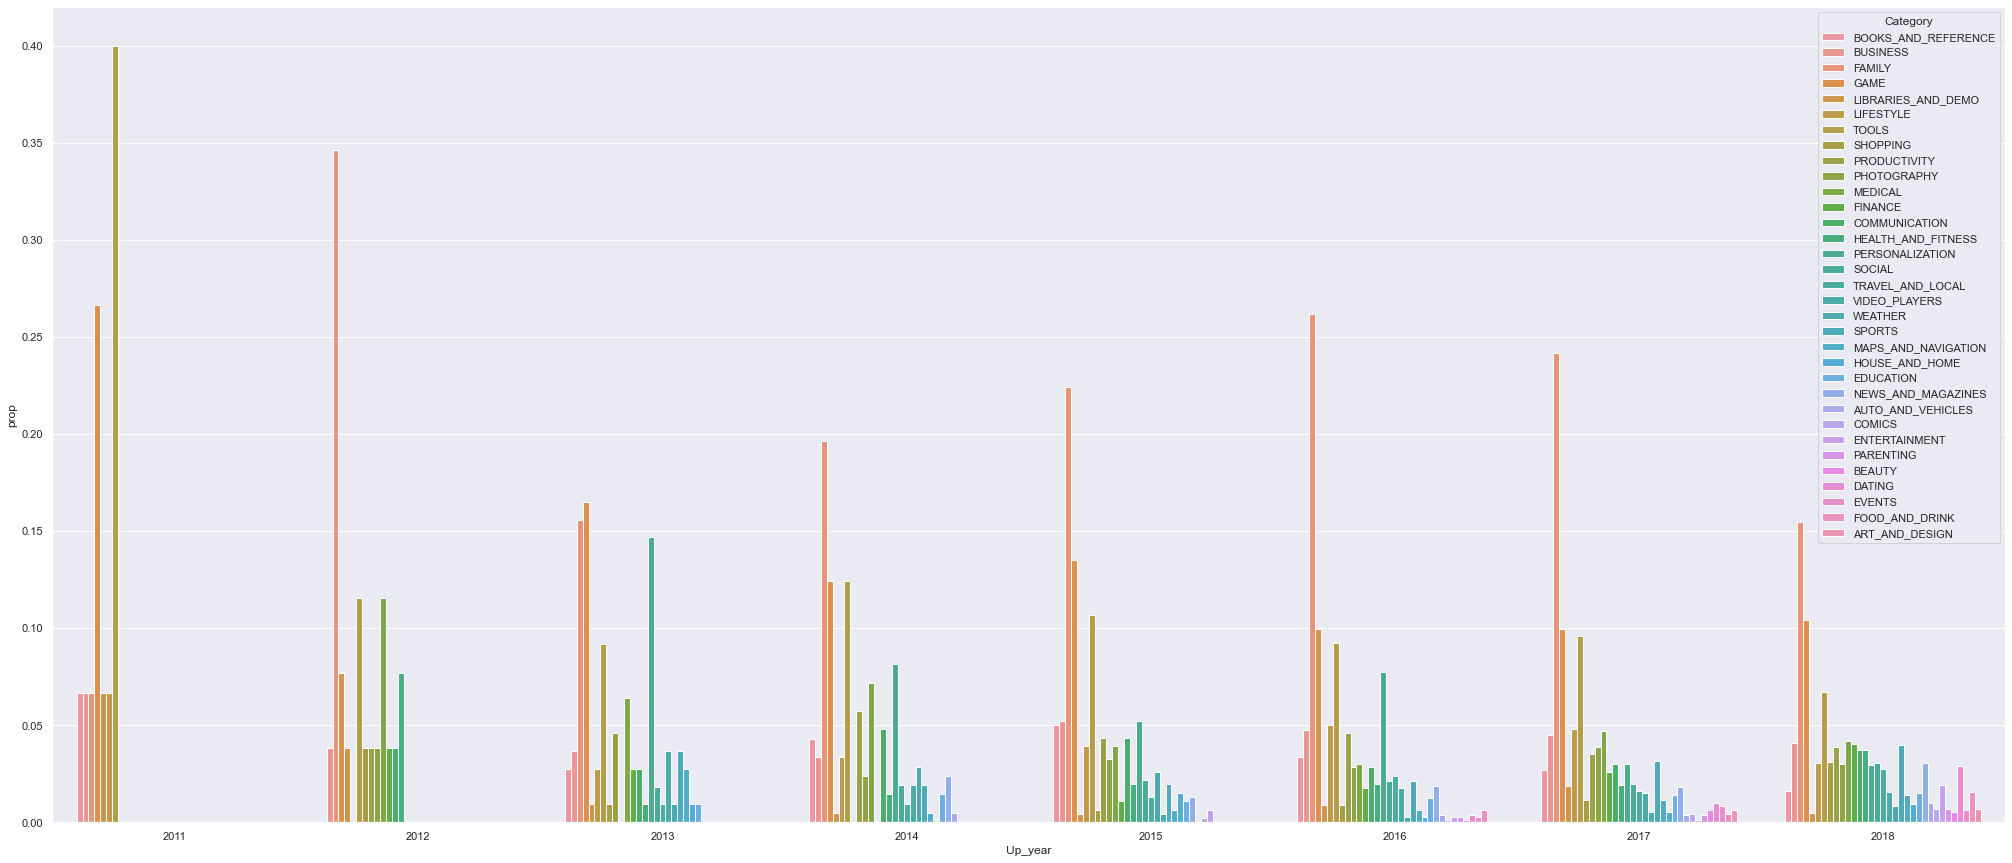

In [46]:
fig = plt.subplots(figsize =(35, 15))
sns.barplot(x='Up_year',y='prop',hue='Category',data=app_cat_yearly)
plt.show()

In [50]:
fig = px.bar(app_cat_yearly, x="Up_year", y="prop",color='Category', barmode='group')
fig.update_yaxes(matches=None)
fig.update_layout(
 width=1150,
    height=500
)

fig.show()


In [44]:
app_df.groupby(["Up_year","Category"]).size().reset_index(name='app_cnt').sort_values(by=['Up_year','Category'])

,Up_year,Category,app_cnt
0,2010,FAMILY,1
1,2011,BOOKS_AND_REFERENCE,1
2,2011,BUSINESS,1
3,2011,FAMILY,1
4,2011,GAME,4
...,...,...,...
183,2018,SPORTS,291
184,2018,TOOLS,494
185,2018,TRAVEL_AND_LOCAL,200
186,2018,VIDEO_PLAYERS,113


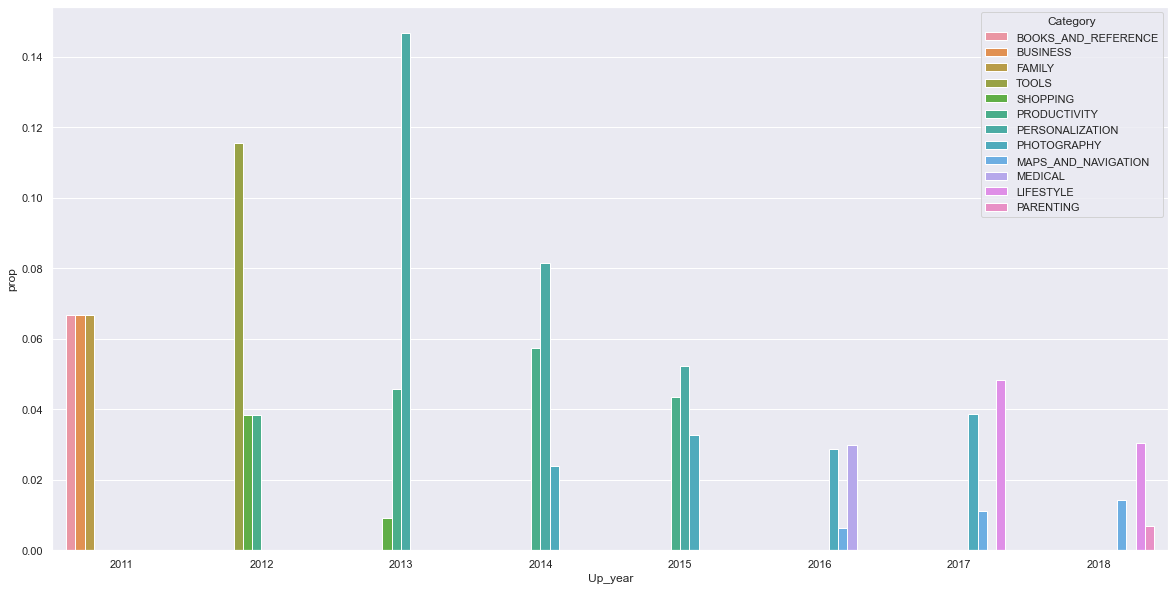

In [45]:
top3_catApp_yearly = app_cat_yearly.groupby('Up_year').head(3).reset_index(drop=True)
fig = plt.subplots(figsize =(20, 10))
sns.barplot(x='Up_year',y='prop',hue='Category',data=top3_catApp_yearly)
plt.show()

### 2.2 App with the largest size

In [46]:
# we will simply sort our dataset to find out, which app has the biggest size.
cols = ["App", "Size"]
size_data = app_df[cols]
size_data = size_data.sort_values(by="Size")
size_data

,App,Size
3596,Family GPS Tracker and Chat + Baby Monitor Online,-1.0
5647,Audiobooks from Audible,-1.0
1467,"realestate.com.au - Buy, Rent & Sell Property",-1.0
1466,"Domofond Real Estate. Buy, rent an apartment.",-1.0
1464,Trulia Rent Apartments & Homes,-1.0
...,...,...
5858,Miami crime simulator,100.0
1563,Talking Babsy Baby: Baby Games,100.0
8400,Car Crash III Beam DH Real Damage Simulator 2018,100.0
8838,Draft Simulator for FUT 18,100.0


In [47]:
max_inst = size_data[size_data["Size"] == size_data.Size.max()].App.to_list()
max_inst

['Hungry Shark Evolution',
 'The Walking Dead: Our World',
 'Gangster Town: Vice District',
 'SimCity BuildIt',
 'Ultimate Tennis',
 'Hungry Shark Evolution',
 'Navi Radiography Pro',
 'Hungry Shark Evolution',
 'Post Bank',
 'Vi Trainer',
 'Stickman Legends: Shadow Wars',
 'Miami crime simulator',
 'Talking Babsy Baby: Baby Games',
 'Car Crash III Beam DH Real Damage Simulator 2018',
 'Draft Simulator for FUT 18',
 'Mini Golf King - Multiplayer Game']

### 2.3 App with the largest num of installs

In [48]:
# unique values of Installs column
cols = ["App", "Installs"]
installs_data = app_data[cols]
installs_data.Installs.unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [49]:
# What can be seen from the list, is that Free value might be absolutely useless in Installs column.
# And, as we are going to transform data to numeric format, 0 the values means that we can drop rows 
# with 0 values as it will help us to transform data easier.

installs_data = installs_data[installs_data.Installs != "Free"]
installs_data = installs_data[installs_data.Installs != "0"]
installs_data.Installs.unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [50]:
installs_data = installs_data.sort_values("Installs")
installs_data

,App,Installs
9719,EP Cook Book,0
8081,CX Network,0
5307,Ak Parti Yardım Toplama,0
8614,Sweden Newspapers,0
9337,EG | Explore Folegandros,0
...,...,...
4170,Google Drive,1000000000
5395,Google Photos,1000000000
3904,WhatsApp Messenger,1000000000
341,Hangouts,1000000000


In [51]:
result = installs_data[installs_data["Installs"] == installs_data.Installs.max()]
result

,App,Installs
3117,Maps - Navigate & Explore,1000000000
3943,Facebook,1000000000
3523,Google Drive,1000000000
3127,Google Street View,1000000000
3996,Google Chrome: Fast & Secure,1000000000
2544,Facebook,1000000000
2853,Google Photos,1000000000
9844,Google News,1000000000
1700,Subway Surfers,1000000000
3928,YouTube,1000000000


In [52]:
# As we can see, there are several duplicates.

result = result.drop_duplicates()

# Result
# The apps from the list below have the highest amount of installs.
result.App


3117                   Maps - Navigate & Explore
3943                                    Facebook
3523                                Google Drive
3127                          Google Street View
3996                Google Chrome: Fast & Secure
2853                               Google Photos
9844                                 Google News
1700                              Subway Surfers
3928                                     YouTube
152                            Google Play Books
4104    Messenger – Text and Video Chat for Free
4096                                       Gmail
5856                           Google Play Games
2545                                   Instagram
2554                                     Google+
381                           WhatsApp Messenger
386                                     Hangouts
391                Skype - free IM & video calls
3687                     Google Play Movies & TV
3234                                      Google
Name: App, dtype: ob

### 2.4.1 Most installed and most rated apps

In [53]:
top_installed_and_rated_apps = app_df.sort_values(by=["Installs", "Rating"], ascending=False)
top_installed_and_rated_apps.head() # main top apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_rating,Genres,Last_updated,Current_ver,Android_ver,LastUpdates,Up_year,Up_month
1652,Subway Surfers,GAME,4.5,27722264.0,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,2018-07-12,2018,7
1698,Subway Surfers,GAME,4.5,27723193.0,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,2018-07-12,2018,7
1748,Subway Surfers,GAME,4.5,27724094.0,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,2018-07-12,2018,7
1870,Subway Surfers,GAME,4.5,27725352.0,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,2018-07-12,2018,7
1915,Subway Surfers,GAME,4.5,27725352.0,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,2018-07-12,2018,7


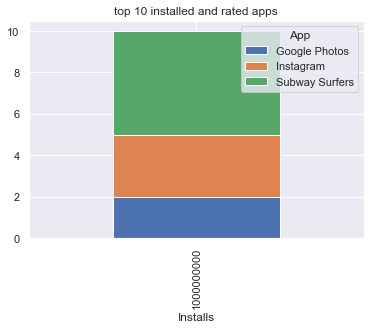

In [54]:

top_10_installed_and_rated_apps= top_installed_and_rated_apps.head(10)
app1= top_10_installed_and_rated_apps
top_apps=app1.groupby(["Installs", "App"]).size().unstack()
top_apps.plot(kind="bar",stacked=True)
plt.title('top 10 installed and rated apps')
ax=plt.gca()
plt.show()

### 2.4.2 Most installed and reviewed apps

In [55]:
top_installed_and_reviewed_apps = app_data.sort_values(by=["Installs", "Reviews"], ascending=False)
top_installed_and_reviewed_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_rating,Genres,Last_updated,Current_ver,Android_ver,LastUpdates,Up_year,Up_month
2544,Facebook,SOCIAL,4.1,78158306.0,-1,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,2018-08-03,2018,8
3943,Facebook,SOCIAL,4.1,78128208.0,-1,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,2018-08-03,2018,8
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,-1,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,2018-08-03,2018,8
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,-1,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,2018-08-03,2018,8
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672.0,-1,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,2018-08-03,2018,8


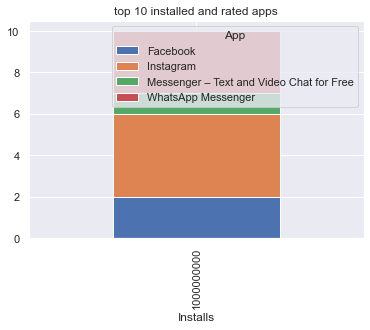

In [56]:

top_10_installed_and_reviewed_apps = top_installed_and_reviewed_apps.head(10)
app2= top_10_installed_and_reviewed_apps
top_apps=app2.groupby(["Installs", "App"]).size().unstack()
top_apps.plot(kind="bar",stacked=True)
plt.title('top 10 installed and rated apps')
ax=plt.gca()
plt.show()

### 2.5 Content Rating Analysis

In [57]:
app_df["Content_rating"].value_counts(ascending=False)

Everyone           8704
Teen               1208
Mature 17+          499
Everyone 10+        413
Adults only 18+       3
Unrated               2
Name: Content_rating, dtype: int64

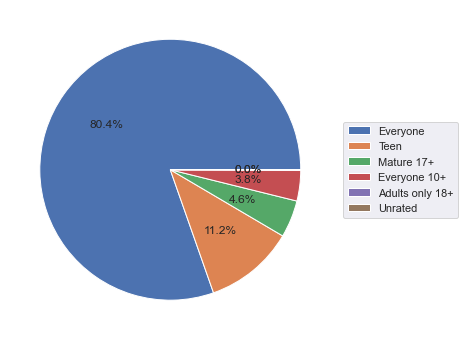

In [58]:
#Basic pie chart to view distribution of apps across various categories
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
number_of_apps = app_df["Content_rating"].value_counts()
labels = number_of_apps.index
sizes = number_of_apps.values
ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))

### 2.6 Price Analysis

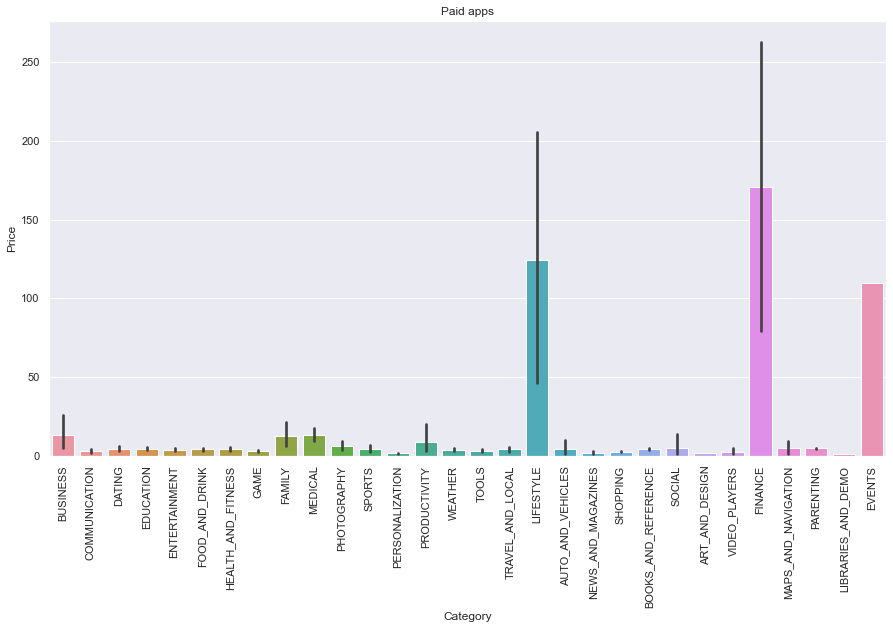

In [59]:
#Let's look at why family even though has lot of apps does not have the highest number of installs. Price could be one of the factors

paid_apps = app_df[app_df["Price"] != 0.0]

paid_family_apps = paid_apps[paid_apps["Category"]=="FAMILY"]
paid_family_apps.count()

paid_communications_apps = paid_apps[paid_apps["Category"]=="COMMUNICATION"]
paid_communications_apps.count()

#Let's visualize this in the form of a simple bar graph
plt.figure(figsize=(15,8))
sns.barplot(x="Category", y="Price", data=paid_apps,
            label="Total Paid Apps in Each Category")
plt.title("Paid apps")
plt.xticks(rotation=90)
plt.show()

In [60]:
# Above plot shows that the apps in the category Lifestyle and Finance have the highest prices.
# Here we look for the top five prices and the number of apps 
app_df["Price"].value_counts().nlargest(5).sort_values(ascending=False)

0.00    10032
0.99      146
2.99      129
1.99       73
4.99       72
Name: Price, dtype: int64

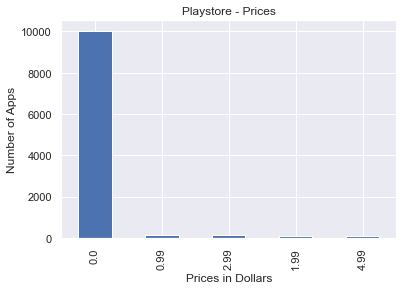

In [61]:
#Now we visualize it by using bar plot
#This plot shows that data has more than 90% apps that are free 
app_df["Price"].value_counts().nlargest(5).sort_values(ascending=False).plot.bar()
plt.ylabel("Number of Apps")
plt.xlabel("Prices in Dollars")
plt.title("Playstore - Prices")
plt.show()

## PART III : Application Ratings Analysis
1. About Ratings 
2. About Categories
3. About Installation


### 3.1 About Ratings
Insights: Average of rating of application in store is around 4 which is very high

In [62]:
app_df['Rating'].describe()

count    10829.000000
mean         4.191827
std          0.479038
min          1.000000
25%          4.100000
50%          4.200000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Distribution of Rating')

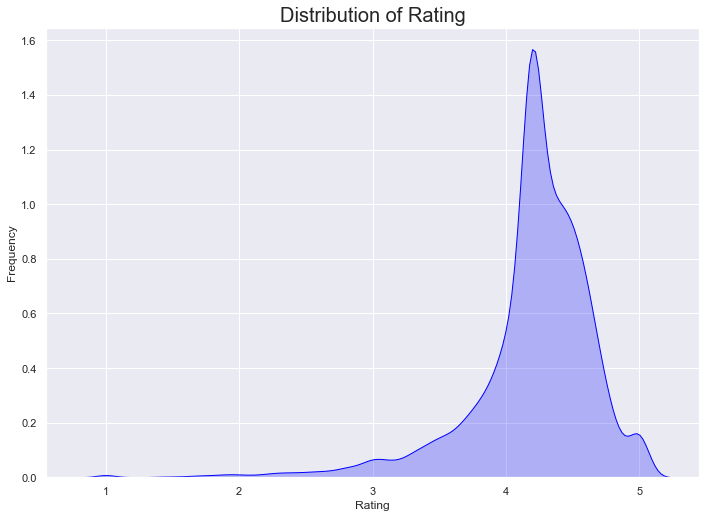

In [63]:
# rating distibution 
from pylab import rcParams
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(app_df.Rating, color="blue", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

### 3.2 About Categories
#### Insights:
1. Game and Family category are the most appearances for application in store 
2. Rating of application in each category is not different too much 


In [64]:
print( len(app_df['Category'].unique()) , "categories")

print("\n", app_df['Category'].unique())

33 categories

 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


Text(0.5, 1.0, 'Count of app in each category')

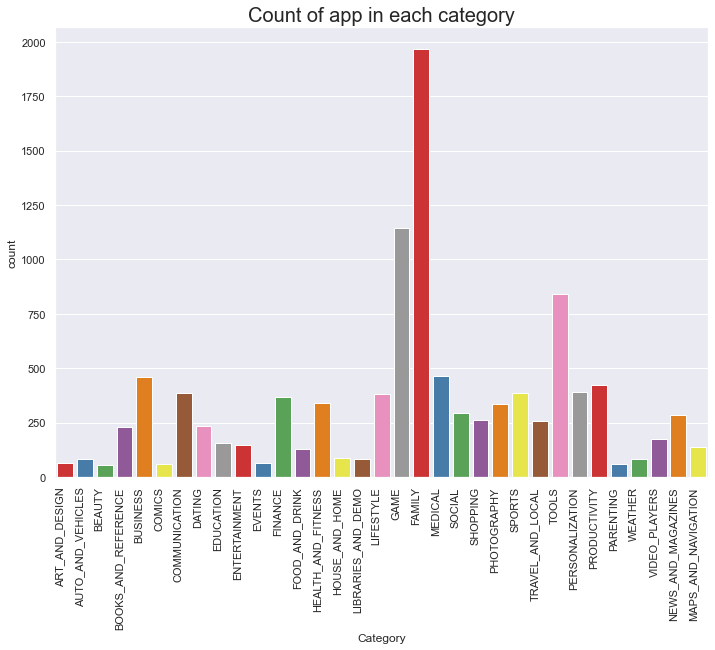

In [65]:
g = sns.countplot(x="Category",data=app_df, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Count of app in each category',size = 20)

Text(0.5, 1.0, 'Boxplot of Rating VS Category')

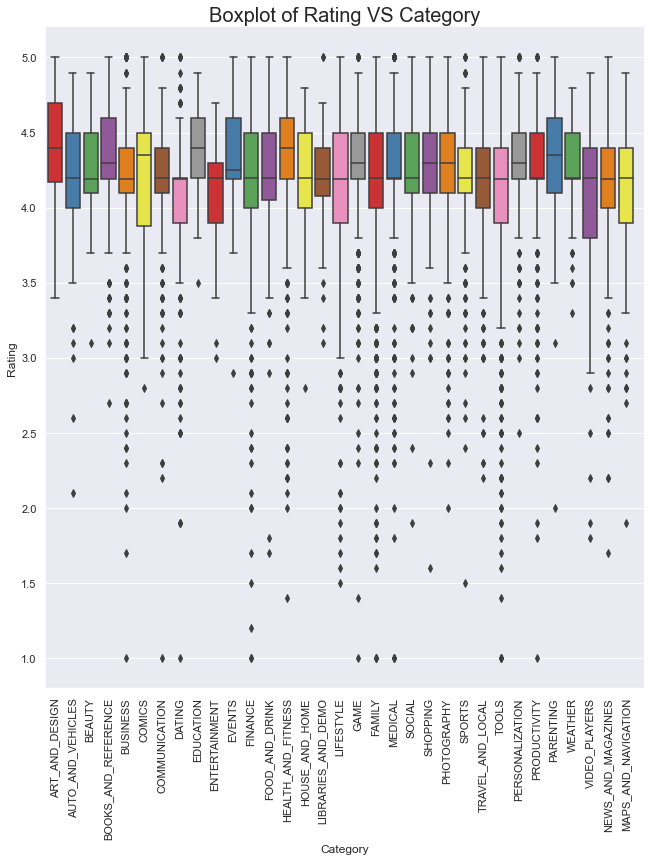

In [66]:
g = sns.catplot(x="Category",y="Rating",data=app_df, kind="box", height = 10 ,
palette = "Set1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Rating")
plt.title('Boxplot of Rating VS Category',size = 20)

### 3.3 About Installations

In [67]:
app_df['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

Text(0.5, 1.0, 'Rating VS Installs')

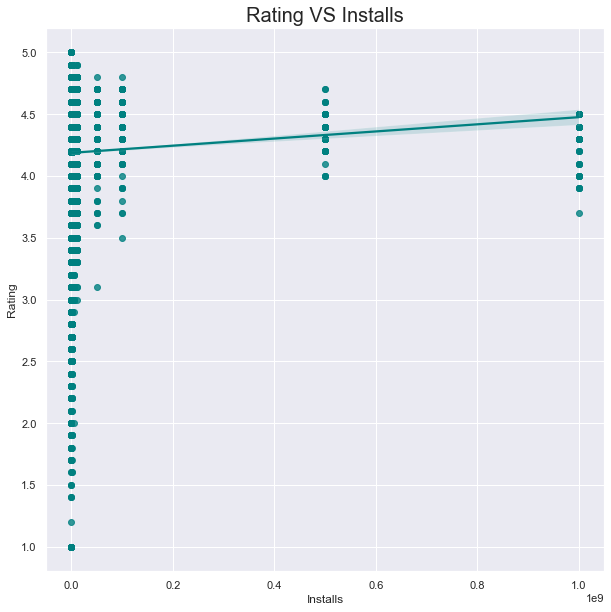

In [68]:
plt.figure(figsize = (10,10))
sns.regplot(x="Installs", y="Rating", color = 'teal',data=app_df);
plt.title('Rating VS Installs',size = 20)

## PART VI : Semi-Structured Data Analysis
1. Data Cleaning
2. Data Analysis

### 4.1 Data Cleaning

In [69]:
reviews_data = pd.read_csv("data/googleplaystore_user_reviews.csv")

reviews_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [70]:
# Dropping the rows corresponding to nan values
reviews_data=reviews_data.dropna()
# the number of unique categories in the dataset
reviews_data.App.nunique()

865

In [71]:
# the information in the dataset
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [72]:
# the statistical information of the dataframe
reviews_data.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


### 4.2 Data Analysis

In [73]:
# For the column sentiment, we find the count of each sentiment in the dataset
reviews_data.Sentiment.value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

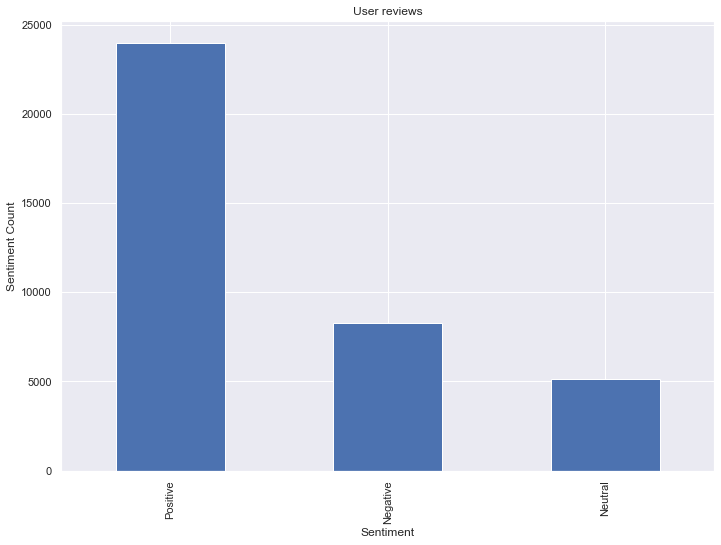

In [74]:
# The barplot of the sentiment count shows that more than 60% of the sentiment is positive
reviews_data["Sentiment"].value_counts().sort_values(ascending=False).plot.bar()
plt.ylabel("Sentiment Count")
plt.xlabel("Sentiment")
plt.title("User reviews")
plt.show()

In [75]:
#Each app has different sentiments. so we use groupby method for app
app_data=reviews_data.groupby("App")
app_data.mean()

,Sentiment_Polarity,Sentiment_Subjectivity
App,,
10 Best Foods for You,0.470733,0.495455
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.392405,0.545516
11st,0.185943,0.455340
1800 Contacts - Lens Store,0.318145,0.591098
1LINE – One Line with One Touch,0.196290,0.557315
...,...,...
Hotels.com: Book Hotel Rooms & Find Vacation Deals,0.101622,0.545444
Hotspot Shield Free VPN Proxy & Wi-Fi Security,0.251765,0.393284
Hotstar,0.038178,0.493964


In [76]:
# Reading maximum value of each of sentiment, sentiment polarity and sentiment subjectivity for each app
app_data.max()

,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
App,,,,
10 Best Foods for You,nice super get,Positive,1.000000,1.00
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,nice,Positive,0.910000,1.00
11st,good good,Positive,1.000000,1.00
1800 Contacts - Lens Store,great,Positive,0.838542,1.00
1LINE – One Line with One Touch,yoko,Positive,1.000000,1.00
...,...,...,...,...
Hotels.com: Book Hotel Rooms & Find Vacation Deals,would actually load anything. I tried uninstal...,Positive,0.700000,0.95
Hotspot Shield Free VPN Proxy & Wi-Fi Security,നോട naffgggg,Positive,1.000000,1.00
Hotstar,running,Positive,1.000000,1.00


In [77]:
# Create a new dataframe that sorts the dataframe corresponding to mean of the data in accordence with sentiment polarity and sentiment subjectivity
sort_df=app_data.mean().sort_values(by=["Sentiment_Polarity","Sentiment_Subjectivity"],ascending=[False,False])
# Here we look for the top positively user reviewed apps
top_positively_user_reviewed_apps=sort_df.head()
top_positively_user_reviewed_apps




,Sentiment_Polarity,Sentiment_Subjectivity
App,,
HomeWork,1.000000,0.300000
Google Slides,0.933333,0.916667
Daily Workouts - Exercise Fitness Routine Trainer,0.800000,0.750000
Bed Time Fan - White Noise Sleep Sounds,0.781250,0.600000
Cameringo Lite. Filters Camera,0.770269,0.533333


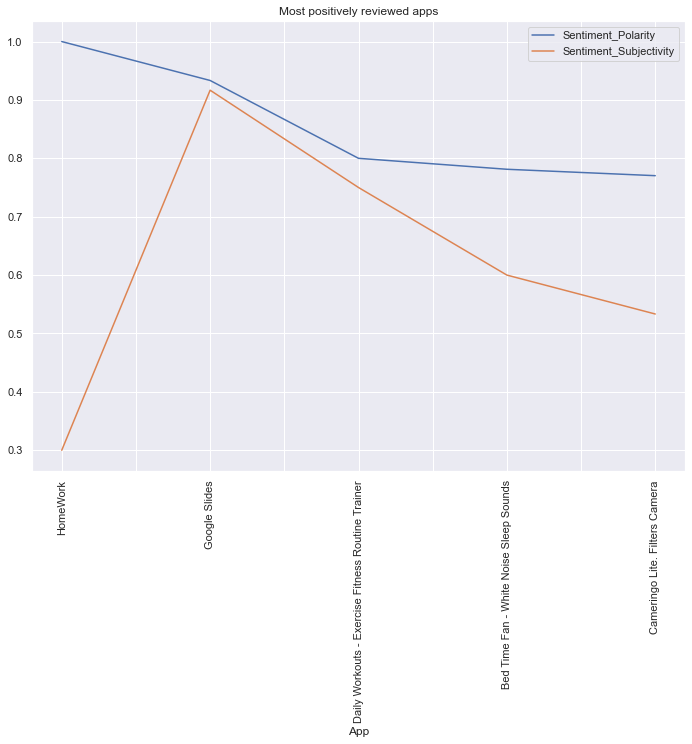

In [78]:
# We plot the line graph for the above dataframe
top_positively_user_reviewed_apps.plot()
plt.xticks(rotation=90)
plt.title("Most positively reviewed apps")
plt.show()

In [79]:
# Here we look for the most negatively reviewed apps
most_negatively_reviewed_apps=sort_df.tail()
most_negatively_reviewed_apps

,Sentiment_Polarity,Sentiment_Subjectivity
App,,
Call of Duty:Black Ops Zombies,-0.162120,0.442716
Fruit Block - Puzzle Legend,-0.183333,0.377778
DEER HUNTER 2018,-0.383333,0.433333
Google Street View,-0.500000,0.691667
Draw Your Game,-0.668490,0.683333


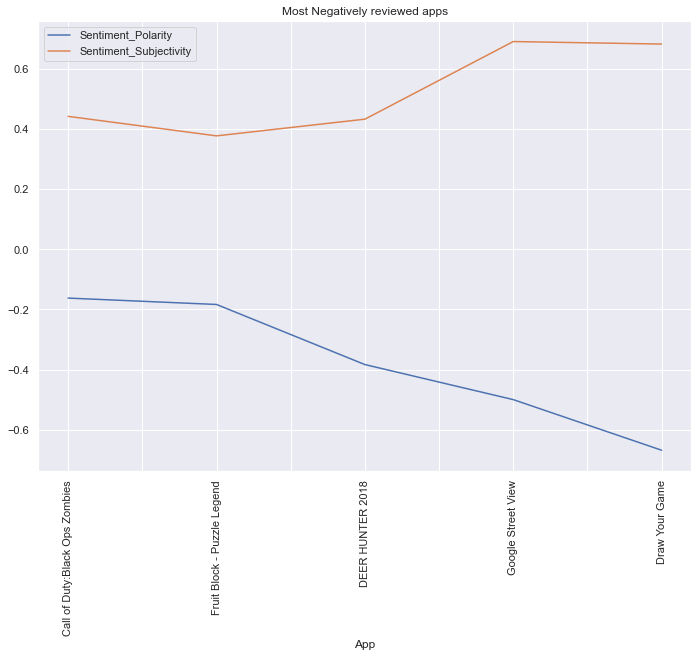

In [80]:
#Line graph for above dataframe
most_negatively_reviewed_apps.plot()
plt.xticks(rotation=90)
plt.title('Most Negatively reviewed apps')
plt.show()

### 4.3 Review Word Cloud

In [81]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize

In [82]:
reviews_data.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [83]:
tk_list = reviews_data["Translated_Review"].tolist()
ttokenizer = nltk.tokenize.TweetTokenizer()
all_tweet_tokens = [tok.lower() for tweet in tk_list for tok in ttokenizer.tokenize(tweet)]
len(all_tweet_tokens)

820643

In [84]:
all_tweet_tokens

['i',
 'like',
 'eat',
 'delicious',
 'food',
 '.',
 "that's",
 "i'm",
 'cooking',
 'food',
 'myself',
 ',',
 'case',
 '"',
 '10',
 'best',
 'foods',
 '"',
 'helps',
 'lot',
 ',',
 'also',
 '"',
 'best',
 'before',
 '(',
 'shelf',
 'life',
 ')',
 '"',
 'this',
 'help',
 'eating',
 'healthy',
 'exercise',
 'regular',
 'basis',
 'works',
 'great',
 'especially',
 'going',
 'grocery',
 'store',
 'best',
 'idea',
 'us',
 'best',
 'way',
 'amazing',
 'looking',
 'forward',
 'app',
 ',',
 'it',
 'helpful',
 'site',
 '!',
 'it',
 'help',
 'foods',
 'get',
 '!',
 'good',
 'you',
 '.',
 'useful',
 'information',
 'the',
 'amount',
 'spelling',
 'errors',
 'questions',
 'validity',
 'information',
 'shared',
 '.',
 'once',
 'fixed',
 ',',
 '5',
 'stars',
 'given',
 '.',
 'thank',
 'you',
 '!',
 'great',
 'app',
 '!',
 '!',
 'add',
 'arthritis',
 ',',
 'eyes',
 ',',
 'immunity',
 ',',
 'kidney',
 '/',
 'liver',
 'detox',
 'foods',
 'please',
 '.',
 ':)',
 'greatest',
 'ever',
 'completely',
 'awe

In [85]:
# function that takes a word and returns true if it consists only
#   of non-alphabetic characters
import re

def alpha_filter(w):
    # pattern to match a word of non-alphabetical characters
    pattern = re.compile('^[^a-z]+$')
    if (pattern.match(w)):
        return True
    else:
        return False

In [86]:
nltk_stopwords = nltk.corpus.stopwords.words('english')
len(nltk_stopwords)

179

In [87]:
all_stopped_tokens = [tok for tok in all_tweet_tokens if not tok in nltk_stopwords]
all_stopped_tokens[:50]
len(all_stopped_tokens)

709887

In [88]:
filtered_token_list = [tok for tok in all_stopped_tokens if not alpha_filter(tok)]
filtered_token_list[:30]

['like',
 'eat',
 'delicious',
 'food',
 "that's",
 "i'm",
 'cooking',
 'food',
 'case',
 'best',
 'foods',
 'helps',
 'lot',
 'also',
 'best',
 'shelf',
 'life',
 'help',
 'eating',
 'healthy',
 'exercise',
 'regular',
 'basis',
 'works',
 'great',
 'especially',
 'going',
 'grocery',
 'store',
 'best']

In [89]:
msgFD = nltk.FreqDist(filtered_token_list)
top_words = msgFD.most_common(100)
for word, freq in top_words:
    print(word, freq)

game 9330
like 5494
good 5269
app 4914
great 4809
get 4718
love 4673
time 4500
would 3376
really 3096
even 2886
can't 2681
ads 2656
update 2528
i'm 2509
play 2461
phone 2392
please 2391
work 2347
also 2330
much 2302
easy 2153
make 2048
way 2022
many 2012
want 2007
new 1976
best 1966
need 1943
back 1891
every 1890
still 1881
fix 1842
fun 1841
i've 1821
better 1757
see 1667
nice 1663
free 1614
used 1580
could 1576
go 1556
using 1540
well 1536
money 1512
keep 1477
people 1449
give 1388
problem 1380
add 1372
know 1298
pay 1290
never 1266
version 1234
screen 1232
think 1216
level 1216
able 1215
find 1196
lot 1184
stars 1183
thing 1177
always 1138
first 1116
times 1116
open 1115
works 1098
without 1077
option 1074
google 1073
playing 1072
day 1064
try 1063
ever 1031
got 1023
awesome 1014
since 994
use 977
u 974
bad 967
account 966
help 965
games 963
full 955
getting 920
working 915
one 911
far 892
things 891
tried 890
amazing 888
review 881
change 880
something 879
years 872
watch 864
wish 8

In [90]:
word_fre = pd.DataFrame(top_words,
                    columns=['Word', 'Frequency'])
word_fre.head(5)

,Word,Frequency
0,game,9330
1,like,5494
2,good,5269
3,app,4914
4,great,4809


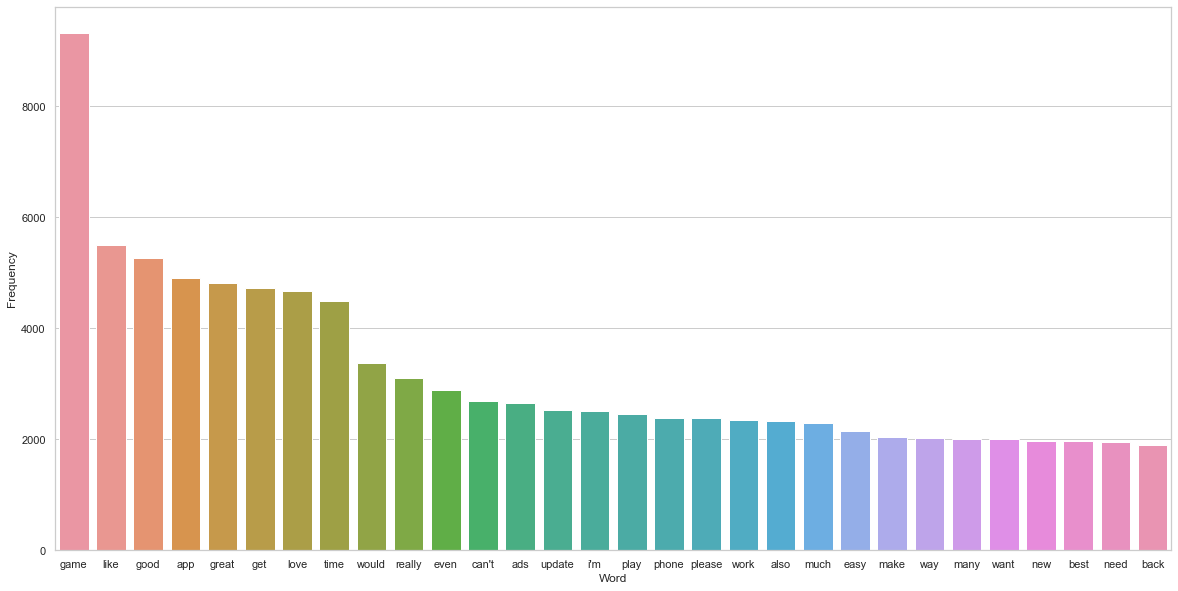

In [91]:
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=word_fre.head(30))

In [92]:
#pip install wordcloud

In [93]:
from wordcloud import WordCloud

In [94]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

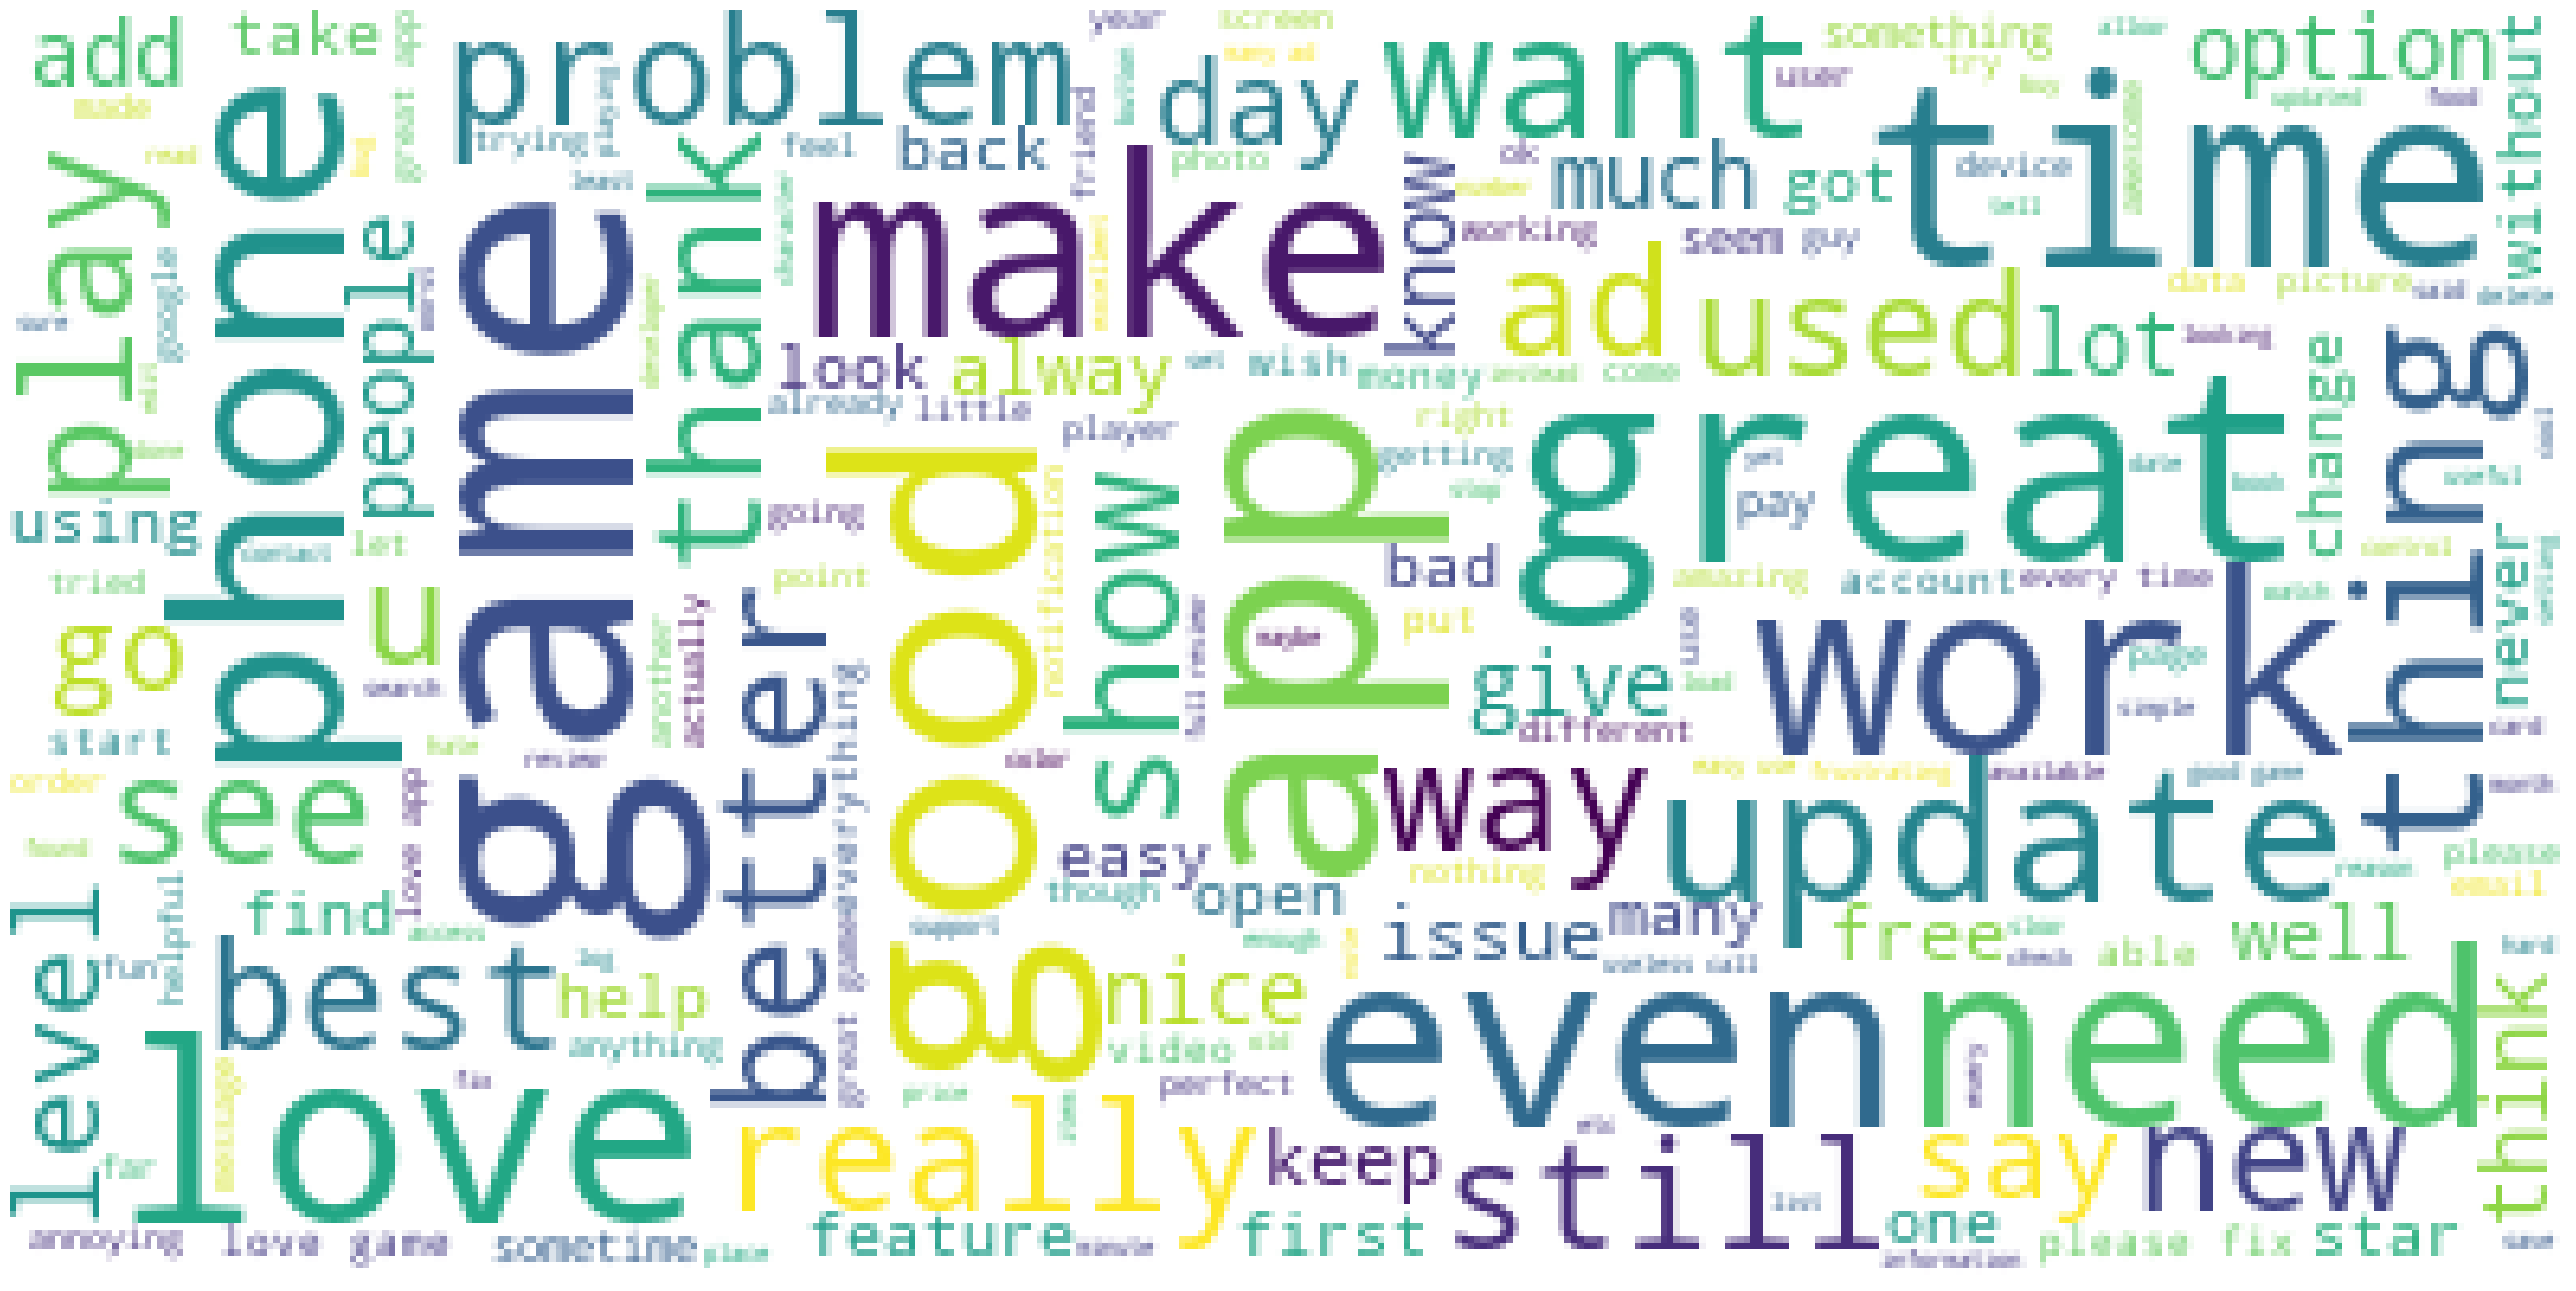

In [95]:
wc(filtered_token_list,'white','Common Words' )